# **Data Collection**

## Objectives

* Upload dataset file into explorer panel.
* Inspect the data and save it under ../house-price-20211124T154130Z-001

## Inputs

* Extract file through terminal, using command 'unzip file_name.zip' 

## Outputs

* Archive:  archive.zip
  inflating: house-metadata.txt      
  inflating: house-price-20211124T154130Z-001/house-price/house_prices_records.csv  
  inflating: house-price-20211124T154130Z-001/house-price/inherited_houses.csv  

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


# Change working directory
We need to change the working directory from its current folder to its parent folder

We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/housing-market-analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/housing-market-analysis'

---

# Import Packages

* Import packages using the 'import' statement followed by the name of the package. For example, 'import pandas' which is commonly used for data manipulation and analysis. This is  followed by and alias of your choice, preferably as pd although it is arbitrary.

In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the dataset using the pandas method '.read_csv', and sample it to retrieve only 20% of the dataframe, ensuring reproducibility by specifying a random_state. Then, use the 'shape()' method to analyze the number of rows and columns in the dataset.

In [5]:
# Load dataset
df = pd.read_csv("/workspace/housing-market-analysis/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df = df.sample(frac=0.2, random_state=101)
print(df.shape)
df.head(5)

(292, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1054,1091,898.0,3.0,Mn,932,GLQ,133,NaN,586,Fin,...,90.0,210.0,60,5,8,1065,NaN,2002,2002,255000
361,988,517.0,3.0,No,399,Rec,484,NaN,240,NaN,...,NaN,0.0,0,5,5,883,NaN,1940,1982,145000
1282,1040,0.0,3.0,Mn,532,LwQ,364,NaN,484,Unf,...,61.0,0.0,0,7,5,1040,NaN,1977,2008,150500
161,1572,1096.0,3.0,Av,1016,GLQ,556,NaN,726,Fin,...,110.0,664.0,0,5,9,1572,NaN,2003,2004,412500
515,2020,0.0,3.0,No,1436,GLQ,570,NaN,900,Fin,...,94.0,305.0,54,5,10,2006,NaN,2009,2009,402861


* DataFrame information

In [6]:
df.dtypes['WoodDeckSF']
df.dtypes['BsmtExposure']

dtype('O')

In [7]:
df['WoodDeckSF'].fillna(0.0)
df.isnull().sum()

1stFlrSF           0
2ndFlrSF          16
BedroomAbvGr      18
BsmtExposure       0
BsmtFinSF1         0
BsmtFinType1      25
BsmtUnfSF          0
EnclosedPorch    270
GarageArea         0
GarageFinish      31
GarageYrBlt       16
GrLivArea          0
KitchenQual        0
LotArea            0
LotFrontage       45
MasVnrArea         0
OpenPorchSF        0
OverallCond        0
OverallQual        0
TotalBsmtSF        0
WoodDeckSF       269
YearBuilt          0
YearRemodAdd       0
SalePrice          0
dtype: int64

# Section 1

* Using feature_engine to replace all numeical & categorical missing data
* Using sklearn.preprocessing to scale all the numerical variables

In [8]:
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler

# Identify missing values
missing_values = df.isnull().sum()

# Separate columns by data type
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numeric columns using median
numeric_imputer = MeanMedianImputer(imputation_method='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values for categorical columns using most frequent
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])




# Heatmap
I used a heatmap to visualize all the numerical variables in the dataset and gain insight into which features correlate the most and which correlate the least.

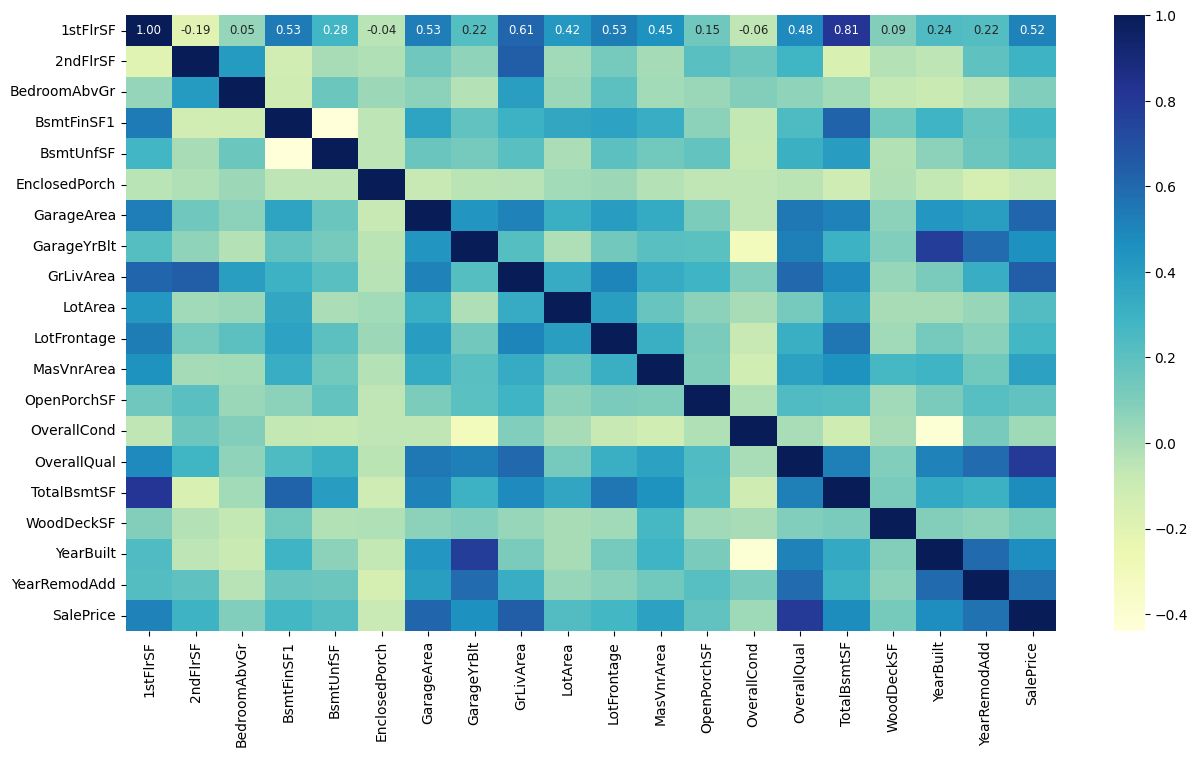

In [17]:
plt.figure(figsize=(15, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f", annot_kws={"size": 8.5})
plt.show()


---

* All missing columns have been filled in 

In [10]:
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1054,1091,898.0,3.0,Mn,932,GLQ,133,0.0,586,Fin,...,90.0,210.0,60,5,8,1065,0.0,2002,2002,255000
361,988,517.0,3.0,No,399,Rec,484,0.0,240,Unf,...,66.0,0.0,0,5,5,883,0.0,1940,1982,145000
1282,1040,0.0,3.0,Mn,532,LwQ,364,0.0,484,Unf,...,61.0,0.0,0,7,5,1040,0.0,1977,2008,150500
161,1572,1096.0,3.0,Av,1016,GLQ,556,0.0,726,Fin,...,110.0,664.0,0,5,9,1572,0.0,2003,2004,412500
515,2020,0.0,3.0,No,1436,GLQ,570,0.0,900,Fin,...,94.0,305.0,54,5,10,2006,0.0,2009,2009,402861


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/house-price-2021.csv",index=False)


[Errno 17] File exists: 'outputs/datasets/collection'
